<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Cristina Lobera de la Mora e Esther Itzel Sanromán Santana.

**Fecha:** 28 de febrero del 2020.

**Expediente** : 715635.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10

In [1]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

## Enunciado de tarea

### Ejercicio 1: 
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

### Código de solución 
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(1+k)k!}$$
$$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

### Respuesta planteada en el ejercicio usando
 La respuesta es $$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

## Enunciado de tarea
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$

### Ejercicio: 
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

El máximo de f es:  [1.875]


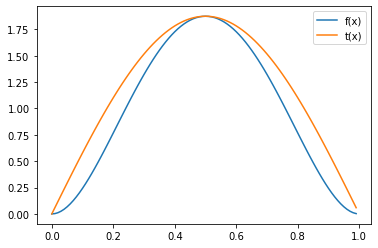

In [2]:
# Código de solución 
# Función objetivo 
f = lambda x: 30*(x**2 - 2*x**3 + x**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
# Función t -> Función no constante
t = lambda x: a * np.sin(np.pi * x) # función no constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es: ', a)
# Gráficas de las funciones
plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.legend()
plt.show()

### Respuesta planteada en el ejercicio usando
 La respuesta es  $ t(x) > f(x) $

### Ejercicio: 
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

# Código de solución 
$$ g(x) = \frac{t(x)}{c} $$ 

$$ t(x) = a \sin(\pi x) $$

$$ c = \int_{-\infty}^{\infty}t(x)d(x)\ $$

La gráfica anterior nos muestra que va de 0 a 1, entonces:

$$ \int_{0}^{1}t(x)d(x) = \int_{0}^{1}a\sin(\pi x) $$

$$ = \frac{-a\cos(\pi x)}{\pi} \Big|_0^1 $$

$$ = -\frac{a\cos(\pi)}{\pi}+ \frac{a\cos(0)}{\pi} $$

$$ = -\frac{a(-1)}{\pi}+ \frac{a(1)}{\pi} $$

$$ c = \frac{a}{\pi}+\frac{a}{\pi}=\frac{2a}{\pi} $$

$$ g(x)=\frac{\pi\sin(\pi x)}{2} $$

### Respuesta planteada en el ejercicio usando
 La respuesta es $$ g(x)=\frac{\pi\sin(\pi x)}{2} $$

### Ejercicio: 
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

#### Código de solución 
Integrar y sacar la inversa 
$$ g(x)=\frac{\pi\sin(\pi x)}{2} $$

$$ \int_{0}^{x} \frac{\pi\sin(\pi y)}{2} dy $$

Evaluamos de 0 a x porque no puede ser menor a 0

$$ = -\displaystyle\frac{1}{2} cos(\pi y) \Big|_0^x $$

$$ = -\frac{cos(\pi x)}{2} + \frac{cos(\pi 0)}{2} $$

$$ = -\frac{cos(\pi x)}{2} + \frac{1}{2} $$

$$ = U $$

$$ -\frac{cos(\pi x)}{2} = U - \frac{1}{2} $$

$$ -cos(\pi x) = 2 (U - \frac{1}{2}) $$

$$ cos(\pi x) = 1 - 2U $$

Usamos $cos^{-1}$ para poder despejar

$$ \pi x = \arccos(1 - 2U) $$

$$ x = \frac{1}{\pi} \arccos{(1 - 2U)} $$

### Respuesta planteada en el ejercicio usando
 La respuesta es $$ x = \frac{1}{\pi} \arccos{(1 - 2U)} $$

### Ejercicio: 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
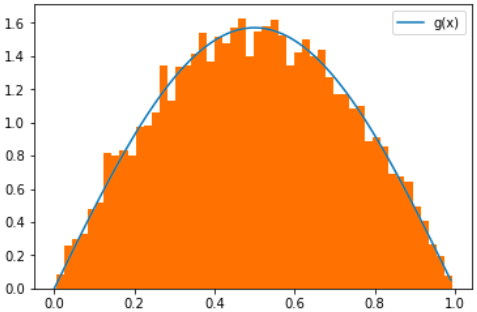

In [3]:
# Código de solución 
g = lambda x: np.pi*np.sin(np.pi*x)/2
r2=lambda x: np.arccos(1-2*U)/np.pi
N = 10000
U = np.random.rand(N)
xx=r2(U)
y,xn,ig = plt.hist(xx, bins=47, density = True)
plt.plot(xn,f(xn),label='g(x)')
plt.legend()
plt.show()

### Respuesta planteada en el ejercicio usando
 La respuesta es .........

### Ejercicio: 
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
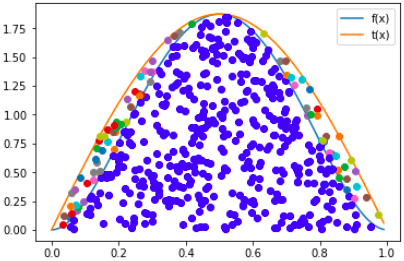

In [4]:
# Código de solución 
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]   
    plt.show()

El máximo de f es:  [1.875]


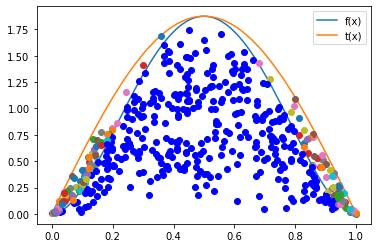

In [7]:
# Función objetivo 
f = lambda x: 30*(x**2 - 2*x**3 + x**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
# Función t -> Función no constante
t = lambda x: a * np.sin(np.pi * x)

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es: ', a)

# Gráficas de las funciones
plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
#U = np.random.uniform(0, 2/np.pi, N)
U = np.random.rand(N)
x = lambda U: (1/np.pi) * (np.arccos(1 - 2*U))
R2 = np.random.rand(N)
R1 = x(U)   # es la integral de g y despeje hacia x

Acep_rechazo(R1,R2,f,t)

### Respuesta planteada en el ejercicio usando
 La respuesta es la gráfica.

### Ejercicio: 
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [ ]:
# Código de solución 
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',<
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]      
    plt.show()


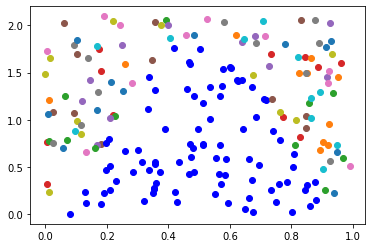

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [19]:
# Función objetivo cuando t(x) constante
f = lambda x: 30*(x**2 - 2*x**3 + x**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones

# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

aceptar_constante = Acep_rechazo(R2,R1,f,t)/len(R1)

### Respuesta planteada en el ejercicio usando
 La respuesta es .........

### Ejercicio: 
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de f es:  [2.109375]


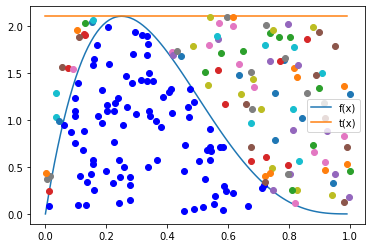

In [15]:
# Código de solución 
# Función objetivo 
f = lambda x: 20 * x * (1 - x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es: ', max_f)

# Gráficas de las funciones
plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.legend()

# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)
# constante

### Respuesta planteada en el ejercicio usando
 La respuesta es la gráfica.